In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()

Accuracy of the classifier = 99.5 %


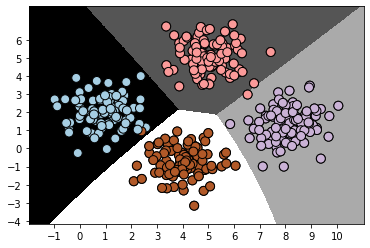

In [3]:
input_file = 'data_multivar.txt'

X = []
y = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1]) 

X = np.array(X)
y = np.array(y)

classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

# compute accuracy of the classifier
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print ("Accuracy of the classifier =", round(accuracy, 2), "%")

plot_classifier(classifier_gaussiannb, X, y)

There is no restriction on the boundaries to be linear here. In the preceding example,
we used up all the data for training. A good practice in machine learning is to have
nonoverlapping data for training and testing. Ideally, we need some unused data
for testing so that we can get an accurate estimate of how the model performs on
unknown data. There is a provision in scikit-learn that handles this very well, as
shown in the next recipe.

In [4]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

Accuracy of the classifier = 98.0 %


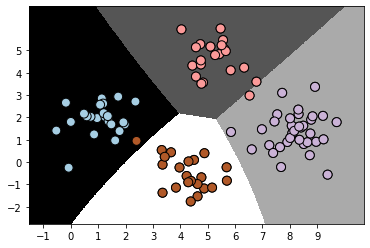

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)
y_test_pred = classifier_gaussiannb_new.predict(X_test)

# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print ("Accuracy of the classifier =", round(accuracy, 2), "%")

plot_classifier(classifier_gaussiannb_new, X_test, y_test)

In [6]:
from sklearn.model_selection import cross_val_score

num_validations = 5
accuracy = cross_val_score(classifier_gaussiannb, X, y, scoring='accuracy', cv=num_validations)

print ("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

Accuracy: 99.5%


In [7]:
f1 = cross_val_score(classifier_gaussiannb, X, y, scoring='f1_weighted', cv=num_validations)

print ("F1: " + str(round(100*f1.mean(), 2)) + "%")

F1: 99.5%


In [8]:
precision = cross_val_score(classifier_gaussiannb, X, y, scoring='precision_weighted', cv=num_validations)

print ("Precision: " + str(round(100*precision.mean(), 2)) + "%")

Precision: 99.52%


In [9]:
recall = cross_val_score(classifier_gaussiannb, X, y, scoring='recall_weighted', cv=num_validations)

print ("Recall: " + str(round(100*recall.mean(), 2)) + "%")

Recall: 99.5%
